Reformatted code blocks to allow graph viewing without interact (mines broken)

In [54]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from ipywidgets import interact, widgets, Dropdown, interactive
from statsmodels.tsa.arima.model import ARIMA
import warnings
from IPython.display import display
warnings.filterwarnings("ignore")

In [106]:
# define clothing items for filtering
clothing_items = [
    'Tunic', 'Tank Top', 'Leggings', 'Onesie', 'Jacket', 'Trousers', 'Jeans',
    'Pajamas', 'Trench Coat', 'Poncho', 'Romper', 'T-shirt', 'Shorts',
    'Blazer', 'Hoodie', 'Sweater', 'Blouse', 'Swimsuit', 'Kimono', 'Cardigan',
    'Dress', 'Camisole', 'Flannel Shirt', 'Polo Shirt', 'Overalls', 'Coat',
    'Vest', 'Jumpsuit', 'Raincoat', 'Skirt', 'Pants'
]

# function to load and preprocess dataset
def load_and_clean_data(csv_path="retail_sales.csv"):
    df = pd.read_csv(csv_path)
    df['date'] = pd.to_datetime(df['date'])
    df = df.dropna(subset=['amount_usd'])
    #df['review'] = df.groupby('item')['review'].transform(lambda x: x.fillna(x.mean()))
    df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
    df = df[df['item'].isin(clothing_items)].copy()
    return df

# load once and reuse
df = load_and_clean_data()
df

,customerID,item,amount_usd,date,review,payment,month
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,2023-07-01
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,2023-03-01
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,2023-03-01
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card,2022-12-01
6,4055,Jacket,2571.0,2023-07-08,1.3,Cash,2023-07-01
...,...,...,...,...,...,...,...
3388,4094,Trench Coat,17.0,2023-02-13,2.5,Credit Card,2023-02-01
3392,3981,Sweater,99.0,2022-10-25,4.5,Cash,2022-10-01
3393,4110,Polo Shirt,42.0,2022-10-15,4.0,Cash,2022-10-01
3394,4040,Tank Top,113.0,2023-01-20,1.2,Credit Card,2023-01-01


OUT OF DATE

In [ ]:
# define clothing items for filtering
clothing_items = [
    'Tunic', 'Tank Top', 'Leggings', 'Onesie', 'Jacket', 'Trousers', 'Jeans',
    'Pajamas', 'Trench Coat', 'Poncho', 'Romper', 'T-shirt', 'Shorts',
    'Blazer', 'Hoodie', 'Sweater', 'Blouse', 'Swimsuit', 'Kimono', 'Cardigan',
    'Dress', 'Camisole', 'Flannel Shirt', 'Polo Shirt', 'Overalls', 'Coat',
    'Vest', 'Jumpsuit', 'Raincoat', 'Skirt', 'Pants'
]

# function to load and preprocess dataset
def load_and_clean_data(csv_path="retail_sales.csv"):
    df = pd.read_csv(csv_path)
    df['date'] = pd.to_datetime(df['date'])
    df = df.dropna(subset=['amount_usd'])
    df['review'] = df.groupby('item')['review'].transform(lambda x: x.fillna(x.mean()))
    df['amount_usd'] = df.groupby('item')['amount_usd'].transform(lambda x: x.fillna(x.mean()))
    df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
    df = df[df['item'].isin(clothing_items)].copy()
    return df

# load once and reuse
df = load_and_clean_data()
df

In [ ]:
# load the dataset
df = load_and_clean_data()

# create user-item review matrix
user_item_matrix = df.pivot_table(index='customerID', columns='item', values='review', aggfunc='mean')
user_item_filled = user_item_matrix.fillna(0)
item_user_matrix = user_item_filled.T

# compute cosine similarity between items
item_similarity_matrix = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=item_user_matrix.index, columns=item_user_matrix.index)

item_similarity_df

In [118]:
from sklearn.metrics.pairwise import cosine_similarity

# We'll use the df_sample from earlier (pretending it's the user's actual df)
# Step 1: Create user-item review matrix
user_item_matrix = df.pivot_table(index='customerID', columns='item', values='review', aggfunc='mean')

# Step 2: Convert to numpy array, center by item (column), but preserve NaNs
item_mat = user_item_matrix.to_numpy()
item_means = np.nanmean(item_mat, axis=0)
item_mat_centered = item_mat - item_means  # this will preserve NaNs

# Step 3: Compute cosine similarity only using shared (non-NaN) ratings
item_names = user_item_matrix.columns
n_items = item_mat_centered.shape[1]
item_similarity_df = pd.DataFrame(index=item_names, columns=item_names, dtype=float)

for i in range(n_items):
    for j in range(n_items):
        vec_i = item_mat_centered[:, i]
        vec_j = item_mat_centered[:, j]

        shared = ~np.isnan(vec_i) & ~np.isnan(vec_j)

        if np.sum(shared) > 1:
            sim = cosine_similarity(vec_i[shared].reshape(1, -1), vec_j[shared].reshape(1, -1))[0, 0]
        else:
            sim = np.nan

        item_similarity_df.iloc[i, j] = sim

item_similarity_df

item,Blazer,Blouse,Camisole,Cardigan,Coat,Dress,Flannel Shirt,Hoodie,Jacket,Jeans,...,Shorts,Skirt,Sweater,Swimsuit,T-shirt,Tank Top,Trench Coat,Trousers,Tunic,Vest
item,,,,,,,,,,,,,,,,,,,,,
Blazer,1.000000,0.677718,-0.037996,-0.381059,0.259027,0.075455,0.065506,0.129767,0.111952,0.444099,...,-0.041236,0.185372,0.316087,-0.815436,0.020859,0.375784,-0.414125,0.149659,0.173674,0.163911
Blouse,0.677718,1.000000,-0.132301,-0.099889,-0.019207,-0.237407,0.268434,0.192684,0.678368,0.420295,...,0.557906,-0.467093,0.145350,-0.354217,0.127414,-0.227700,-0.024790,0.265876,-0.011705,0.088511
Camisole,-0.037996,-0.132301,1.000000,0.551967,0.191293,0.370939,0.450536,0.142072,-0.127248,0.269746,...,0.291170,0.015149,-0.128844,0.244543,0.278620,0.076199,0.554679,0.530316,-0.100148,-0.215002
Cardigan,-0.381059,-0.099889,0.551967,1.000000,0.028160,0.503560,0.112417,-0.078554,-0.168655,-0.401371,...,-0.320418,-0.054592,-0.287373,-0.086917,0.307243,-0.106317,0.045457,-0.529594,-0.420337,-0.235136
Coat,0.259027,-0.019207,0.191293,0.028160,1.000000,-0.322930,0.232293,0.212548,-0.591009,-0.101388,...,0.401304,-0.097370,-0.746964,0.194417,0.400585,0.476120,-0.199583,-0.386298,0.514497,0.036707
Dress,0.075455,-0.237407,0.370939,0.503560,-0.322930,1.000000,0.460615,-0.147796,0.126762,-0.223350,...,-0.077824,0.177587,-0.200839,-0.247195,-0.274455,0.093641,-0.067333,-0.116785,-0.209936,-0.462404
Flannel Shirt,0.065506,0.268434,0.450536,0.112417,0.232293,0.460615,1.000000,-0.276135,0.250968,-0.079775,...,0.285695,0.381191,0.171085,0.313272,-0.349990,0.089183,-0.172733,0.332862,0.291815,0.102135
Hoodie,0.129767,0.192684,0.142072,-0.078554,0.212548,-0.147796,-0.276135,1.000000,0.079161,0.164329,...,0.060627,-0.108036,-0.049701,0.553818,0.105800,-0.233260,0.218107,-0.152044,-0.051573,-0.158084
Jacket,0.111952,0.678368,-0.127248,-0.168655,-0.591009,0.126762,0.250968,0.079161,1.000000,0.479647,...,-0.471869,-0.045201,0.425864,0.076841,-0.488099,-0.443067,-0.352852,0.323329,-0.109550,0.125123


In [112]:
item_mat

array([[nan, 2.1, 4.7, ..., nan, nan, 3.2],
       [nan, 3.3, nan, ..., nan, 1.1, nan],
       [1.8, nan, nan, ..., 4.5, nan, nan],
       ...,
       [nan, nan, nan, ..., 2. , 1.2, nan],
       [nan, 4.6, nan, ..., 3.4, nan, nan],
       [4.6, nan, 4.2, ..., nan, nan, nan]])

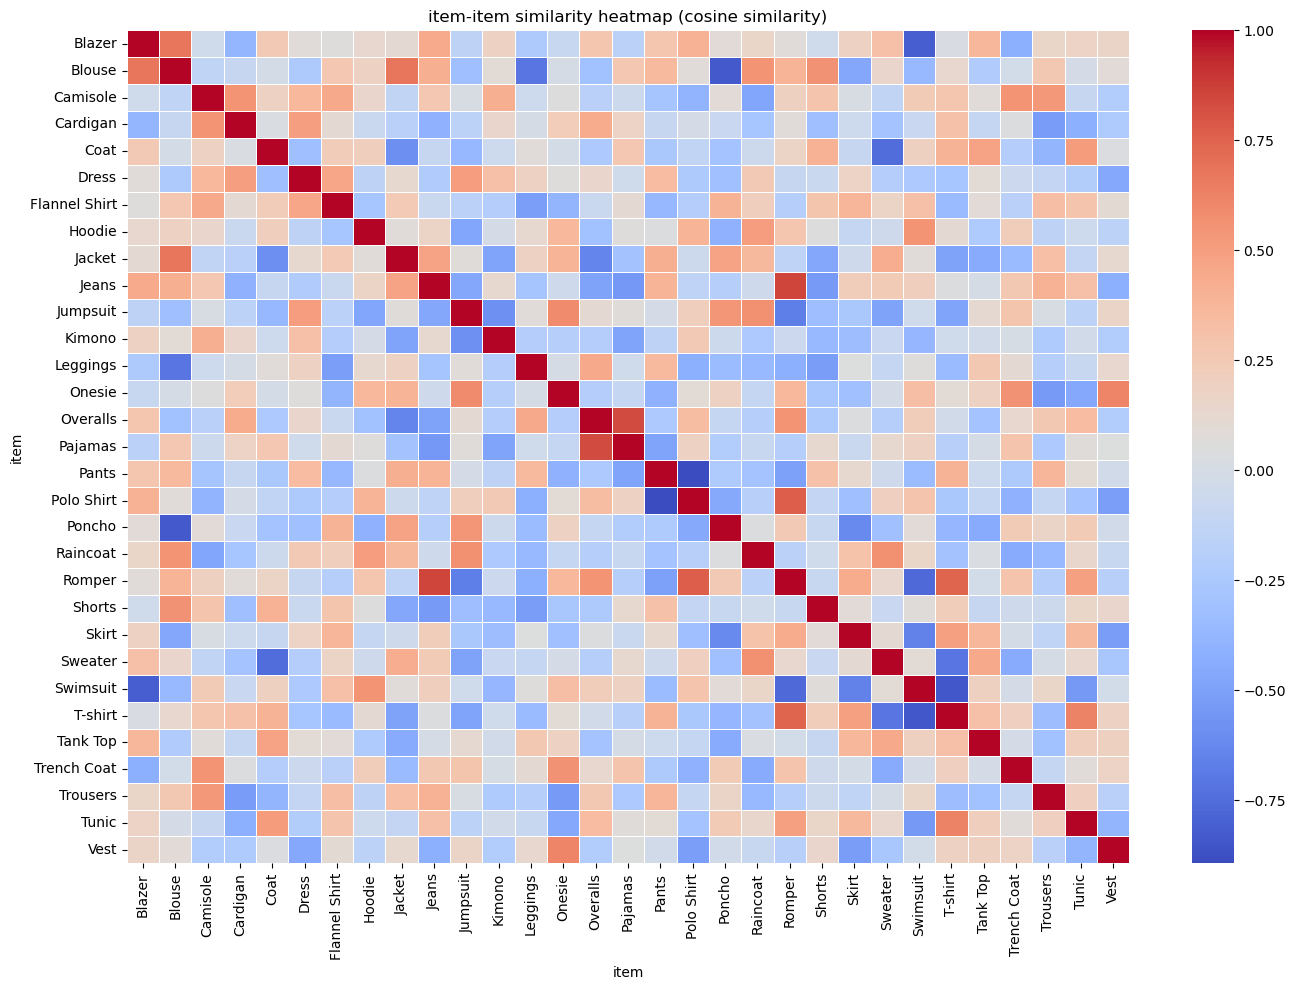

In [104]:
# plot heatmap of item similarity
plt.figure(figsize=(14, 10))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5,
            xticklabels=item_similarity_df.columns, yticklabels=item_similarity_df.index)
plt.title("item-item similarity heatmap (cosine similarity)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("item-item-heatmap.png", bbox_inches='tight')
plt.show()

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Create user-item review matrix
user_item_matrix = df.pivot_table(index='customerID', columns='item', values='review', aggfunc='mean')

# Step 2: Fill missing with 0 (or leave NaN depending on strategy)
user_item_filled = user_item_matrix.fillna(0)

# Step 3: Transpose to item-user (each row = item vector across users)
item_user_matrix = user_item_filled.T

# Step 4: Center and scale each item vector
scaler = StandardScaler(with_mean=True, with_std=True)
item_user_scaled = scaler.fit_transform(item_user_matrix)

# Step 5: Compute cosine similarity manually or with sklearn
item_similarity_matrix = cosine_similarity(item_user_scaled)

# Step 6: Store in a DataFrame
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=item_user_matrix.index, columns=item_user_matrix.index)

item_similarity_df


item,Blazer,Blouse,Camisole,Cardigan,Coat,Dress,Flannel Shirt,Hoodie,Jacket,Jeans,...,Shorts,Skirt,Sweater,Swimsuit,T-shirt,Tank Top,Trench Coat,Trousers,Tunic,Vest
item,,,,,,,,,,,,,,,,,,,,,
Blazer,1.000000,-0.007286,-0.033504,-0.086086,0.089460,-0.058081,-0.043414,0.024110,0.044757,-0.076812,...,0.038013,-0.036057,0.009841,-0.156788,-0.133892,-0.049143,0.046781,0.020287,-0.003942,-0.085391
Blouse,-0.007286,1.000000,-0.064284,0.057531,0.007337,-0.075279,-0.079062,-0.058977,-0.049975,-0.132722,...,-0.070304,-0.060900,0.003539,-0.007582,-0.007009,-0.124574,0.009227,-0.040044,-0.095255,-0.052365
Camisole,-0.033504,-0.064284,1.000000,-0.013248,0.089230,-0.111522,-0.055634,-0.019188,-0.011557,-0.035378,...,-0.190190,-0.068915,-0.001722,0.050416,-0.039564,0.012920,-0.064622,-0.145330,-0.129859,-0.020538
Cardigan,-0.086086,0.057531,-0.013248,1.000000,-0.135767,-0.097248,-0.096128,0.114335,0.068466,-0.152158,...,-0.092686,-0.185575,-0.084609,0.005260,0.026236,-0.054880,-0.013475,-0.006880,-0.040385,-0.124419
Coat,0.089460,0.007337,0.089230,-0.135767,1.000000,0.007468,-0.107027,-0.004002,0.041284,-0.014156,...,-0.063569,-0.032007,-0.104971,-0.037145,-0.096946,-0.148822,-0.173062,-0.007222,-0.016278,0.074327
Dress,-0.058081,-0.075279,-0.111522,-0.097248,0.007468,1.000000,-0.095745,-0.008437,-0.098103,-0.021025,...,-0.059281,0.012630,-0.116961,0.033932,-0.027118,0.043045,-0.092148,-0.021644,0.053482,0.017877
Flannel Shirt,-0.043414,-0.079062,-0.055634,-0.096128,-0.107027,-0.095745,1.000000,-0.129414,0.018113,-0.007684,...,0.058869,-0.025230,0.111481,-0.067693,-0.001391,-0.191508,0.065504,0.053484,0.124810,-0.121080
Hoodie,0.024110,-0.058977,-0.019188,0.114335,-0.004002,-0.008437,-0.129414,1.000000,-0.056556,-0.135344,...,-0.125835,-0.023997,-0.048268,-0.063269,-0.005248,-0.129791,-0.031775,-0.057386,-0.081737,-0.010017
Jacket,0.044757,-0.049975,-0.011557,0.068466,0.041284,-0.098103,0.018113,-0.056556,1.000000,-0.065586,...,-0.116950,-0.158366,0.006641,-0.064663,-0.130701,-0.071935,-0.022602,-0.061180,-0.088603,-0.106337


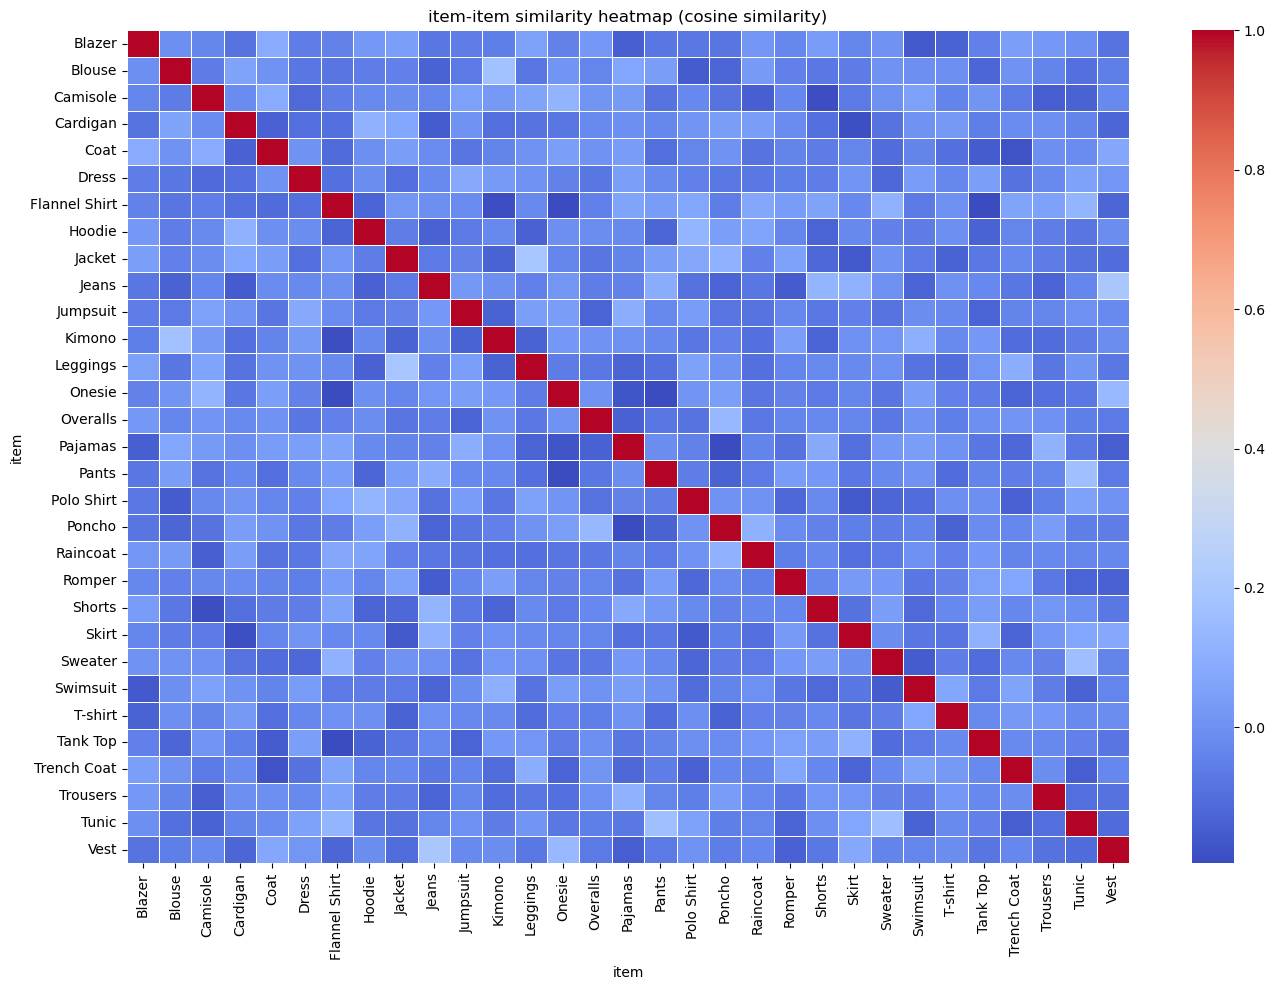

In [110]:
# plot heatmap of item similarity
plt.figure(figsize=(14, 10))
sns.heatmap(item_similarity_df, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5,
            xticklabels=item_similarity_df.columns, yticklabels=item_similarity_df.index)
plt.title("item-item similarity heatmap (cosine similarity)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("item-item-heatmap.png", bbox_inches='tight')
plt.show()

In [92]:
#MANUAL SIMILARITY MATRIX
user_item_matrix = df.pivot_table(index='customerID', columns='item', values='review', aggfunc='mean').fillna(0)
item_user_matrix = user_item_matrix.T
import numpy as np
manual_similarity = pd.DataFrame(index=item_user_matrix.index, columns=item_user_matrix.index)

for item_i in item_user_matrix.index:
    for item_j in item_user_matrix.index:
        vec_i = item_user_matrix.loc[item_i].values
        vec_j = item_user_matrix.loc[item_j].values
        
        dot_product = np.dot(vec_i, vec_j)
        norm_i = np.linalg.norm(vec_i)
        norm_j = np.linalg.norm(vec_j)
        
        if norm_i == 0 or norm_j == 0:
            similarity = 0  
        else:
            similarity = dot_product / (norm_i * norm_j)
        
        manual_similarity.loc[item_i, item_j] = similarity
manual_similarity = manual_similarity.astype(float)
print(manual_similarity)

item             Blazer    Blouse  Camisole  Cardigan      Coat     Dress  \
item                                                                        
Blazer         1.000000  0.269034  0.295436  0.242722  0.299525  0.251524   
Blouse         0.269034  1.000000  0.209378  0.328976  0.297133  0.194275   
Camisole       0.295436  0.209378  1.000000  0.292431  0.344939  0.200492   
Cardigan       0.242722  0.328976  0.292431  1.000000  0.163898  0.225151   
Coat           0.299525  0.297133  0.344939  0.163898  1.000000  0.233803   
Dress          0.251524  0.194275  0.200492  0.225151  0.233803  1.000000   
Flannel Shirt  0.282525  0.170113  0.246504  0.214330  0.171412  0.202205   
Hoodie         0.319720  0.245565  0.313322  0.313503  0.245120  0.269103   
Jacket         0.364543  0.192634  0.282745  0.376980  0.273791  0.209228   
Jeans          0.195559  0.145043  0.269769  0.143659  0.279755  0.236610   
Jumpsuit       0.257565  0.218718  0.374811  0.317824  0.163246  0.323268   

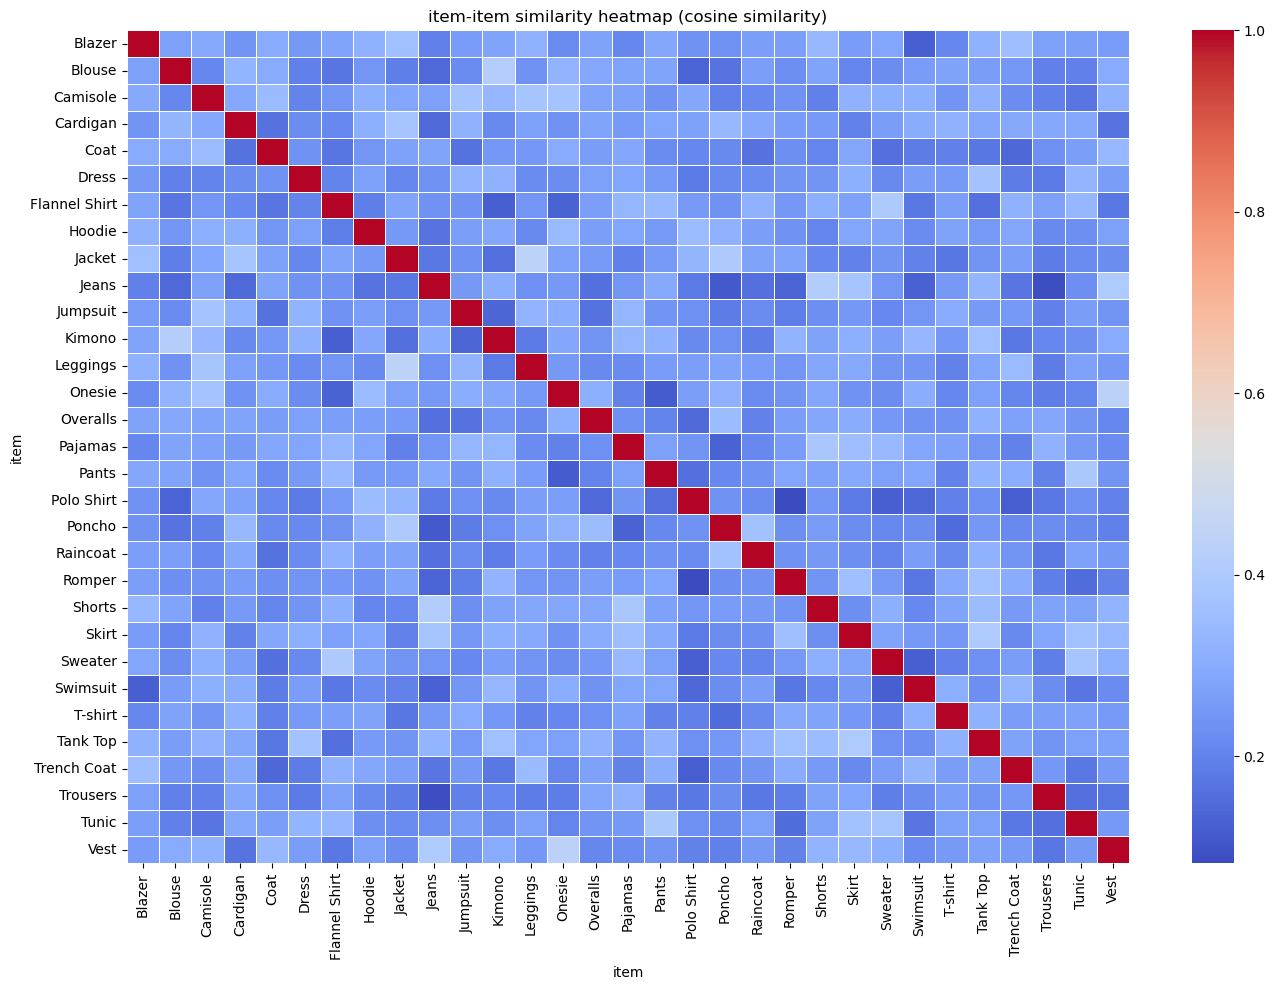

In [94]:
# plot heatmap of item similarity
plt.figure(figsize=(14, 10))
sns.heatmap(manual_similarity, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5,
            xticklabels=item_similarity_df.columns, yticklabels=item_similarity_df.index)
plt.title("item-item similarity heatmap (cosine similarity)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("item-item-heatmap.png", bbox_inches='tight')
plt.show()

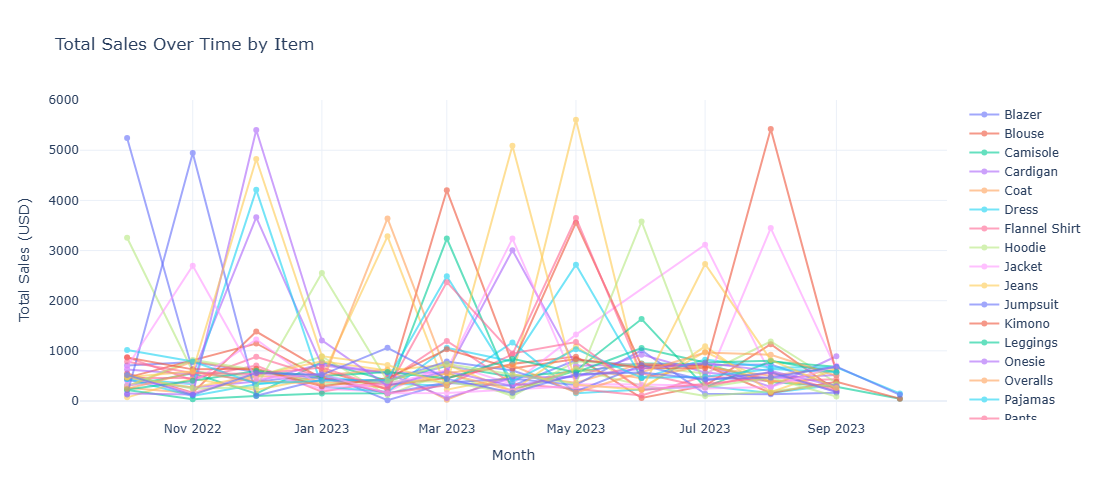

In [120]:
df['month'] = pd.to_datetime(df['date']).dt.to_period("M")
ts_sales = df.groupby(['item', 'month']).agg(
    Total_Sales=('amount_usd', 'sum')
).reset_index()
ts_sales['month'] = ts_sales['month'].dt.to_timestamp()

# Plotly graph Time Series
fig = go.Figure()

for item in ts_sales['item'].unique():
    item_data = ts_sales[ts_sales['item'] == item]
    fig.add_trace(go.Scatter(
        x=item_data['month'],
        y=item_data['Total_Sales'],
        mode='lines+markers',
        name=item,
        hoverinfo='text',
        text=[f"Item: {item}<br>Sales: ${val}" for val in item_data['Total_Sales']],
        line=dict(width=2),
        opacity=0.6
    ))

fig.update_layout(
    title="Total Sales Over Time by Item",
    xaxis_title="Month",
    yaxis_title="Total Sales (USD)",
    hovermode='x unified',
    template='plotly_white',
    height=500
)

fig.show()

In [122]:
# function to find and print top-n similar items based on cosine similarity
def find_similar_items(item_name, top_n=5):
    # convert input to lowercase for case-insensitive matching
    item_name_lower = item_name.lower()
    all_items = list(item_similarity_df.columns)
    
    # match the input item ignoring case
    matched_items = [item for item in all_items if item.lower() == item_name_lower]
    
    if not matched_items:
        print(f"item '{item_name}' not found. please check the spelling or try another item.")
        return
    
    matched_item = matched_items[0]
    
    # get top n similar items
    similar_items = item_similarity_df[matched_item].drop(matched_item).sort_values(ascending=False).head(top_n)
    print(f"\ntop {top_n} items similar to '{matched_item}':")
    for similar_item, score in similar_items.items():
        print(f"{similar_item}: similarity score = {score:.2f}")

# prompt user to input item and number of similar items to display
user_input = input("enter an item name to find similar products: ").strip()
n = int(input("how many similar items do you want to see? (default 5): ") or 5)

find_similar_items(user_input, top_n=n)


enter an item name to find similar products:  Blazer
how many similar items do you want to see? (default 5):  5



top 5 items similar to 'Blazer':
Blouse: similarity score = 0.68
Jeans: similarity score = 0.44
Polo Shirt: similarity score = 0.40
Tank Top: similarity score = 0.38
Sweater: similarity score = 0.32


In [124]:
# count total number of sales
total_sales = len(df)

# count number of unique items
unique_items = df['item'].nunique()

# count item frequency
item_counts = df['item'].value_counts()

# display results
print(f"\ntotal number of sales: {total_sales}")
print(f"number of unique items: {unique_items}")
print("\nitems sold (sorted by quantity):")
print(item_counts)



total number of sales: 1731
number of unique items: 31

items sold (sorted by quantity):
item
Shorts           74
Pants            71
Skirt            70
Tank Top         66
T-shirt          63
Hoodie           62
Camisole         62
Cardigan         61
Pajamas          61
Kimono           61
Poncho           60
Onesie           59
Vest             58
Blouse           57
Trench Coat      56
Raincoat         55
Overalls         54
Tunic            54
Blazer           54
Flannel Shirt    53
Coat             52
Sweater          51
Jacket           50
Swimsuit         49
Leggings         49
Romper           48
Jeans            48
Jumpsuit         46
Dress            44
Polo Shirt       43
Trousers         40
Name: count, dtype: int64


In [126]:
# group by item and month: sum of sales and units sold
ts_sales_full = df.groupby(['item', 'month']).agg(
    Total_Sales=('amount_usd', 'sum'),
    Units_Sold=('item', 'count')
).reset_index()
ts_sales_full['month'] = ts_sales_full['month'].dt.to_timestamp()

# dropdown options
items_list = sorted(ts_sales_full['item'].unique())

# plot function (single item)
def plot_single_item(selected_item):
    if not selected_item:
        return

    item_data = ts_sales_full[ts_sales_full['item'] == selected_item]
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=item_data['month'],
        y=item_data['Total_Sales'],
        mode='lines+markers',
        name=selected_item,
        customdata=item_data[['Units_Sold']],
        hovertemplate=(
            f"<b>{selected_item}</b><br>" +
            "month: %{x|%b %Y}<br>" +
            "sales: $%{y:.2f}<br>" +
            "units sold: %{customdata[0]}<extra></extra>"
        ),
        line=dict(width=2)
    ))
    
    fig.update_layout(
        title=f"Seasonal Sales Trend: {selected_item}",
        xaxis_title="Month",
        yaxis_title="Total Sales (USD)",
        hovermode='closest',
        template='plotly_white',
        height=600
    )
    
    from IPython.display import display
    display(fig)

# single-select dropdown widget
single_dropdown = widgets.Dropdown(
    options=items_list,
    description='Choose item:',
    style={'description_width': 'initial'},
    layout={'width': '50%'}
)

# connect and display the widget
plot_ui = interactive(plot_single_item, selected_item=single_dropdown)
display(plot_ui)


interactive(children=(Dropdown(description='Choose item:', layout=Layout(width='50%'), options=('Blazer', 'Blo…

In [128]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from ipywidgets import Dropdown
from IPython.display import display

# create monthly total sales dataframe
monthly_sales = df.groupby(['item', 'month']).agg(
    Total_Sales=('amount_usd', 'sum')
).reset_index()

# define forecast function
def forecast_item(item_name, periods=6):
    item_data = monthly_sales[monthly_sales['item'] == item_name].copy()
    item_data['month'] = item_data['month'].dt.to_timestamp()
    item_data = item_data.set_index('month').resample('M').sum().fillna(0)

    model = ARIMA(item_data['Total_Sales'], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.get_forecast(steps=periods)
    
    forecast_index = pd.date_range(item_data.index[-1] + pd.DateOffset(months=1), periods=periods, freq='M')
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=item_data.index, y=item_data['Total_Sales'],
                             mode='lines+markers', name='historical sales'))
    fig.add_trace(go.Scatter(x=forecast_index, y=forecast.predicted_mean,
                             mode='lines+markers', name='forecasted sales'))
    
    fig.update_layout(
        title=f"Sales Forecast for {item_name}",
        xaxis_title="Month",
        yaxis_title="Total Sales (USD)",
        template="plotly_white"
    )
    fig.show()

# plain dropdown
item_dropdown = Dropdown(
    options=sorted(monthly_sales['item'].unique()),
    description='Select item:',
    layout={'width': '50%'}
)

# display dropdown and trigger function manually
display(item_dropdown)

Dropdown(description='Select item:', layout=Layout(width='50%'), options=('Blazer', 'Blouse', 'Camisole', 'Car…

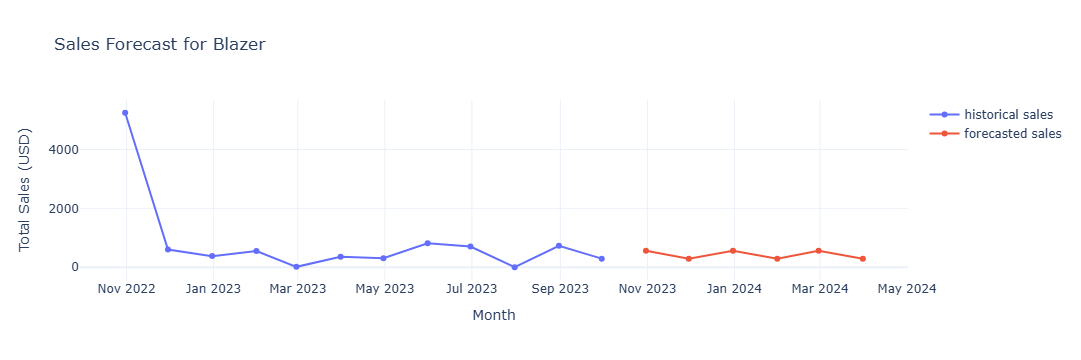

In [130]:
forecast_item(item_dropdown.value)

In [132]:
# find peak sales month for each item
peak_months = monthly_sales.loc[
    monthly_sales.groupby('item')['Total_Sales'].idxmax()
][['item', 'month', 'Total_Sales']].sort_values(by='month')

# display peak month and sales value for each item
print(peak_months)

# this shows the single month each item had its highest total sales
# useful for identifying when to market specific products

# Ordered by month to see which items peak early in the year vs. later.
# ➤ “When should I market this product?”
# ➤ “Which items peak in summer vs. winter?”


              item    month  Total_Sales
0           Blazer  2022-10       5246.0
83          Hoodie  2022-10       3255.0
334       Trousers  2022-11       2696.0
240         Romper  2022-11       4946.0
204     Polo Shirt  2022-11        819.0
167       Overalls  2022-11        787.0
277        Sweater  2022-12       5405.0
156         Onesie  2022-12       3662.0
180        Pajamas  2022-12       4211.0
26        Camisole  2023-01        775.0
360           Vest  2023-02       1060.0
291       Swimsuit  2023-02       3640.0
16          Blouse  2023-03       4202.0
315       Tank Top  2023-03       2370.0
147       Leggings  2023-03       3240.0
76   Flannel Shirt  2023-03       1196.0
303        T-shirt  2023-03       2488.0
66           Dress  2023-04       1167.0
350          Tunic  2023-04       5092.0
42        Cardigan  2023-04       3005.0
113          Jeans  2023-05       5609.0
198          Pants  2023-05       3650.0
136         Kimono  2023-05       3557.0
271          Ski

In [138]:
import pandas as pd
from ipywidgets import Dropdown
from IPython.display import display

# Step 1: Create binary customer-item matrix
basket = df.groupby(['customerID', 'item']).size().unstack(fill_value=0)
basket[basket > 0] = 1  # convert to binary matrix

# Step 2: Co-purchase frequency (item-item)
co_purchase = basket.T.dot(basket).fillna(0)

# Step 3: Combine with cosine similarity to score bundles
bundle_recommendations = []

for item in co_purchase.columns:
    if item not in item_similarity_df.columns:
        continue  # skip if item not in similarity matrix

    # Normalize scores
    co_score = co_purchase[item] / co_purchase[item].max()
    sim_score = item_similarity_df[item] / item_similarity_df[item].max()

    # Combine scores
    combined_score = (co_score.fillna(0) * 0.5) + (sim_score.fillna(0) * 0.5)
    top_bundle = combined_score.drop(item, errors='ignore').sort_values(ascending=False).head(3)

    for related_item, score in top_bundle.items():
        bundle_recommendations.append({
            'item': item,
            'recommended_bundle': related_item,
            'bundle_score': round(score, 3)
        })

# Step 4: Create bundle dataframe
bundle_df = pd.DataFrame(bundle_recommendations)

# Step 5: Dropdown for selecting item
bundle_dropdown = Dropdown(
    options=bundle_df['item'].unique(),
    description="Select item:",
    layout={'width': '50%'}
)
display(bundle_dropdown)

Dropdown(description='Select item:', layout=Layout(width='50%'), options=('Blazer', 'Blouse', 'Camisole', 'Car…

In [140]:
top_related = bundle_df[bundle_df['item'] == bundle_dropdown.value].sort_values(by='bundle_score', ascending=False)
display(top_related[['recommended_bundle', 'bundle_score']])

,recommended_bundle,bundle_score
0,Blouse,0.485
1,Tank Top,0.355
2,Pants,0.318


In [42]:
# segment sales by payment method and review score
# categorize review scores into bins
bins = [0, 2, 3.5, 5]
labels = ['low (<=2)', 'medium (2-3.5)', 'high (>3.5)']
df['review_level'] = pd.cut(df['review'], bins=bins, labels=labels, include_lowest=True)

# group by item, payment method, and review level
segmented_sales = df.groupby(['item', 'payment', 'review_level']).agg(
    total_sales=('amount_usd', 'sum'),
    units_sold=('item', 'count'),
    avg_review=('review', 'mean')
).reset_index().sort_values(['item', 'total_sales'], ascending=[True, False])

# display segmented results
print(segmented_sales)

# interactive dropdown to view segmented sales by item
@interact(item=Dropdown(options=sorted(segmented_sales['item'].unique()), description="item"))
def segment_view(item):
    seg_view = segmented_sales[segmented_sales['item'] == item]
    display(seg_view[['payment', 'review_level', 'total_sales', 'units_sold', 'avg_review']])

       item      payment    review_level  total_sales  units_sold  avg_review
4    Blazer  Credit Card  medium (2-3.5)       5161.0          10    2.620000
2    Blazer         Cash     high (>3.5)       1262.0          10    4.190000
5    Blazer  Credit Card     high (>3.5)       1188.0          12    4.058333
1    Blazer         Cash  medium (2-3.5)       1073.0          10    2.964800
3    Blazer  Credit Card       low (<=2)        662.0           6    1.450000
..      ...          ...             ...          ...         ...         ...
184    Vest  Credit Card  medium (2-3.5)       1195.0          13    2.774556
183    Vest  Credit Card       low (<=2)       1124.0           9    1.522222
181    Vest         Cash  medium (2-3.5)       1018.0          10    3.028462
180    Vest         Cash       low (<=2)        820.0           6    1.566667
185    Vest  Credit Card     high (>3.5)        525.0           6    4.183333

[186 rows x 6 columns]


interactive(children=(Dropdown(description='item', options=('Blazer', 'Blouse', 'Camisole', 'Cardigan', 'Coat'…

In [44]:
from ipywidgets import Dropdown
from IPython.display import display

# Step 1: Create dropdown widget
customer_dropdown = Dropdown(
    options=sorted(df['customerID'].unique()),
    description='Customer ID:',
    layout={'width': '50%'}
)

# Step 2: Display the dropdown
display(customer_dropdown)

# Step 3: After selecting a customer, run this:
# customer_data = df[df['customerID'] == customer_dropdown.value].sort_values(by='date')
# display(customer_data[['date', 'item', 'amount_usd', 'review', 'payment']].reset_index(drop=True))


Dropdown(description='Customer ID:', layout=Layout(width='50%'), options=(3957, 3958, 3959, 3960, 3961, 3962, …

In [46]:
customer_data = df[df['customerID'] == customer_dropdown.value].sort_values(by='date')
display(customer_data[['date', 'item', 'amount_usd', 'review', 'payment']].reset_index(drop=True))


,date,item,amount_usd,review,payment
0,2022-10-03,Tank Top,40.0,2.1,Cash
1,2022-10-07,Coat,90.0,2.1,Credit Card
2,2022-11-04,Camisole,147.0,4.7,Cash
3,2023-01-05,Onesie,32.0,4.3,Cash
4,2023-01-26,Pants,41.0,4.2,Credit Card
5,2023-02-02,Vest,98.0,2.8,Cash
6,2023-03-09,Blouse,183.0,2.1,Credit Card
7,2023-05-17,Vest,180.0,3.6,Cash
8,2023-05-18,Pants,10.0,1.2,Credit Card


In [48]:
from ipywidgets import Dropdown
from IPython.display import display
import plotly.graph_objects as go

# Step 1: Create and display dropdown
review_dropdown = Dropdown(
    options=sorted(df['customerID'].unique()),
    description='Customer ID:',
    layout={'width': '50%'}
)
display(review_dropdown)


Dropdown(description='Customer ID:', layout=Layout(width='50%'), options=(3957, 3958, 3959, 3960, 3961, 3962, …

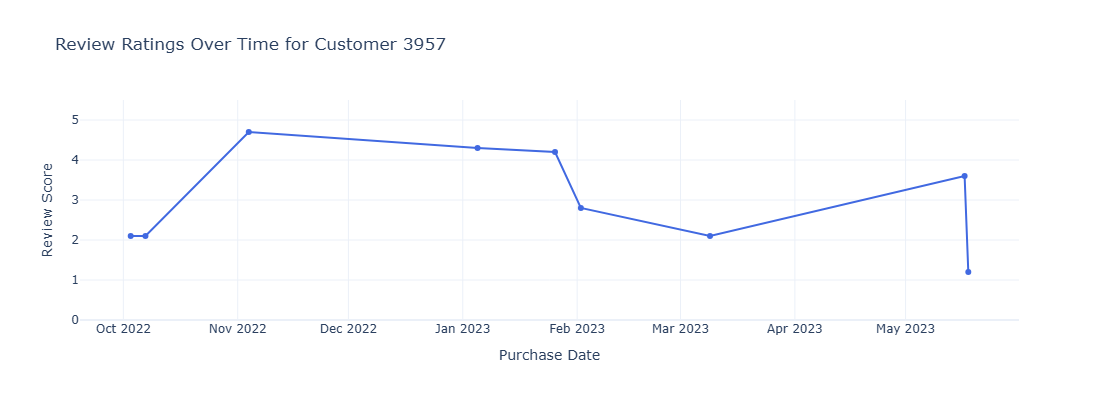

In [50]:
# Step 2: Plot reviews for selected customer
cust_data = df[df['customerID'] == review_dropdown.value].sort_values('date')

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=cust_data['date'],
    y=cust_data['review'],
    mode='lines+markers',
    name=f"customer {review_dropdown.value}",
    text=[f"item: {item}<br>amount: ${amt:.2f}" 
          for item, amt in zip(cust_data['item'], cust_data['amount_usd'])],
    hoverinfo='text+x+y',
    line=dict(color='royalblue', width=2)
))

fig.update_layout(
    title=f"Review Ratings Over Time for Customer {review_dropdown.value}",
    xaxis_title='Purchase Date',
    yaxis_title='Review Score',
    yaxis=dict(range=[0, 5.5]),
    template='plotly_white',
    height=400
)

fig.show()


In [52]:
# calculate first and peak month per item
first_months = monthly_sales.groupby('item')['month'].min().reset_index(name='first_month')
peak_months = monthly_sales.loc[
    monthly_sales.groupby('item')['Total_Sales'].idxmax()
][['item', 'month']].rename(columns={'month': 'peak_month'})

# merge to compute lead time from first sale to peak sale
timing_df = pd.merge(first_months, peak_months, on='item')
timing_df['lead_time_months'] = (
    timing_df['peak_month'].dt.to_period('M') - timing_df['first_month'].dt.to_period('M')
).apply(lambda x: x.n)

# display results
print(timing_df)

# first_month: when the item first appeared in the dataset
# peak_month: when the item had its highest total sales
# lead_time_months: number of months it took to reach peak

# ➤ “How long after launch does this product usually take to become popular?”
# ➤ “How early should I introduce it before expecting strong sales?”

AttributeError: 'PeriodProperties' object has no attribute 'to_period'